# Batch Processing 3D Images

#### Import the necessary libraries

In [1]:
import napari
from napari.utils import nbscreenshot
from skimage.io import imsave
import pyclesperanto_prototype as cle
import numpy as np
import os

#### Put the workflow in a python function

In [2]:
def my_segmentation(input_image_path):
    '''
    This function receives a path to a 3D image file, opens the image, segments it, saves it 
    and returns the output path.
    '''
    # open image
    image = cle.imread(input_image_path)
    # make image isotropic
    rescaled1 = cle.scale(image, factor_x = 0.2, factor_y = 0.2, factor_z = 1, auto_size=True)
    # Subtract background (radius = 5)
    background_subtracted = cle.top_hat_box(rescaled1, radius_x = 5.0, radius_y = 5.0, radius_z = 5.0)
    # Segment objects with voronoi-otsu (spot_sigma = 2, outline_sigma = 2)
    segmented = cle.voronoi_otsu_labeling(background_subtracted, spot_sigma = 2.0, outline_sigma = 2.0)
    # scale label image back to match original image
    rescaled2 = np.empty_like(image)
    rescaled2 = cle.scale(segmented, factor_x = 5, factor_y = 5, factor_z = 1, auto_size=True)
    # turn label image into integer type
    output_image = np.asarray(rescaled2, dtype=int)
    # create a new output fila path
    output_image_path = os.path.splitext(input_image_path)[0] + '_labels.tif'
    # saves the labeled image
    imsave(output_image_path, output_image)
    return(output_image_path)

#### Provide folder path and check what is inside.

In [3]:
folder_path = './data'
file_names = os.listdir(folder_path)
file_names

['BMP4blastocystC3-cropped_resampled_8bit.tif',
 'BMP4blastocystC3-cropped_resampled_8bit_image_data_source.txt',
 'C2-cropped_resampled_8bit.tif',
 'C2-cropped_resampled_8bit_data_source.txt',
 'cells3d_nuclei.tif',
 'copyright_for_cells3d.txt']

#### Iterate over files:

    - if file is an image (i.e. ends with '.tif'), get that `input_image_path`;
    
    - applies `my_segmentation` function to `input_image_path`;
    
    - stores both `input_image_path` and `output_image_path` in lists.

In [4]:
input_file_paths = []
output_file_paths = []
for file_name in file_names:
    if file_name.endswith('.tif'):
        # get input image path
        input_image_path = os.path.join(folder_path, file_name)
        # store input image path in a list
        input_file_paths.append(input_image_path)
        # apply function
        output_image_path = my_segmentation(input_image_path)
        # store output image path in another list
        output_file_paths.append(output_image_path)

C:\Users\mazo260d\AppData\Local\Temp\ipykernel_480\4022358886.py:22: UserWarning: C:\Users\mazo260d\Documents\GitHub\Learning-groups-2022\data\BMP4blastocystC3-cropped_resampled_8bit_labels.tif is a low contrast image
  imsave(output_image_path, output_image)
C:\Users\mazo260d\AppData\Local\Temp\ipykernel_480\4022358886.py:22: UserWarning: C:\Users\mazo260d\Documents\GitHub\Learning-groups-2022\data\C2-cropped_resampled_8bit_labels.tif is a low contrast image
  imsave(output_image_path, output_image)
C:\Users\mazo260d\AppData\Local\Temp\ipykernel_480\4022358886.py:22: UserWarning: C:\Users\mazo260d\Documents\GitHub\Learning-groups-2022\data\cells3d_nuclei_labels.tif is a low contrast image
  imsave(output_image_path, output_image)


#### Open napari viewer

In [5]:
viewer = napari.Viewer()

Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.


#### Add inputs (images) and outputs (labels) to the viewer
This for loop iterates over two lists (`image_file_paths` and `output_images`) at the same time.

It also shows isotropic images (`scale=(5,1,1)`)

__Warning__: if you have large images, you should not load all of them at once like that. Your computer may not have enough memory.

In [6]:
for input_file_path, output_file_path in zip(input_file_paths, output_file_paths):
    viewer.add_image(cle.imread(input_file_path), scale=(5,1,1), name = os.path.basename(input_file_path))
    viewer.add_labels(cle.imread(output_file_path).astype(int), scale=(5,1,1))

Adjust visualization:

INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


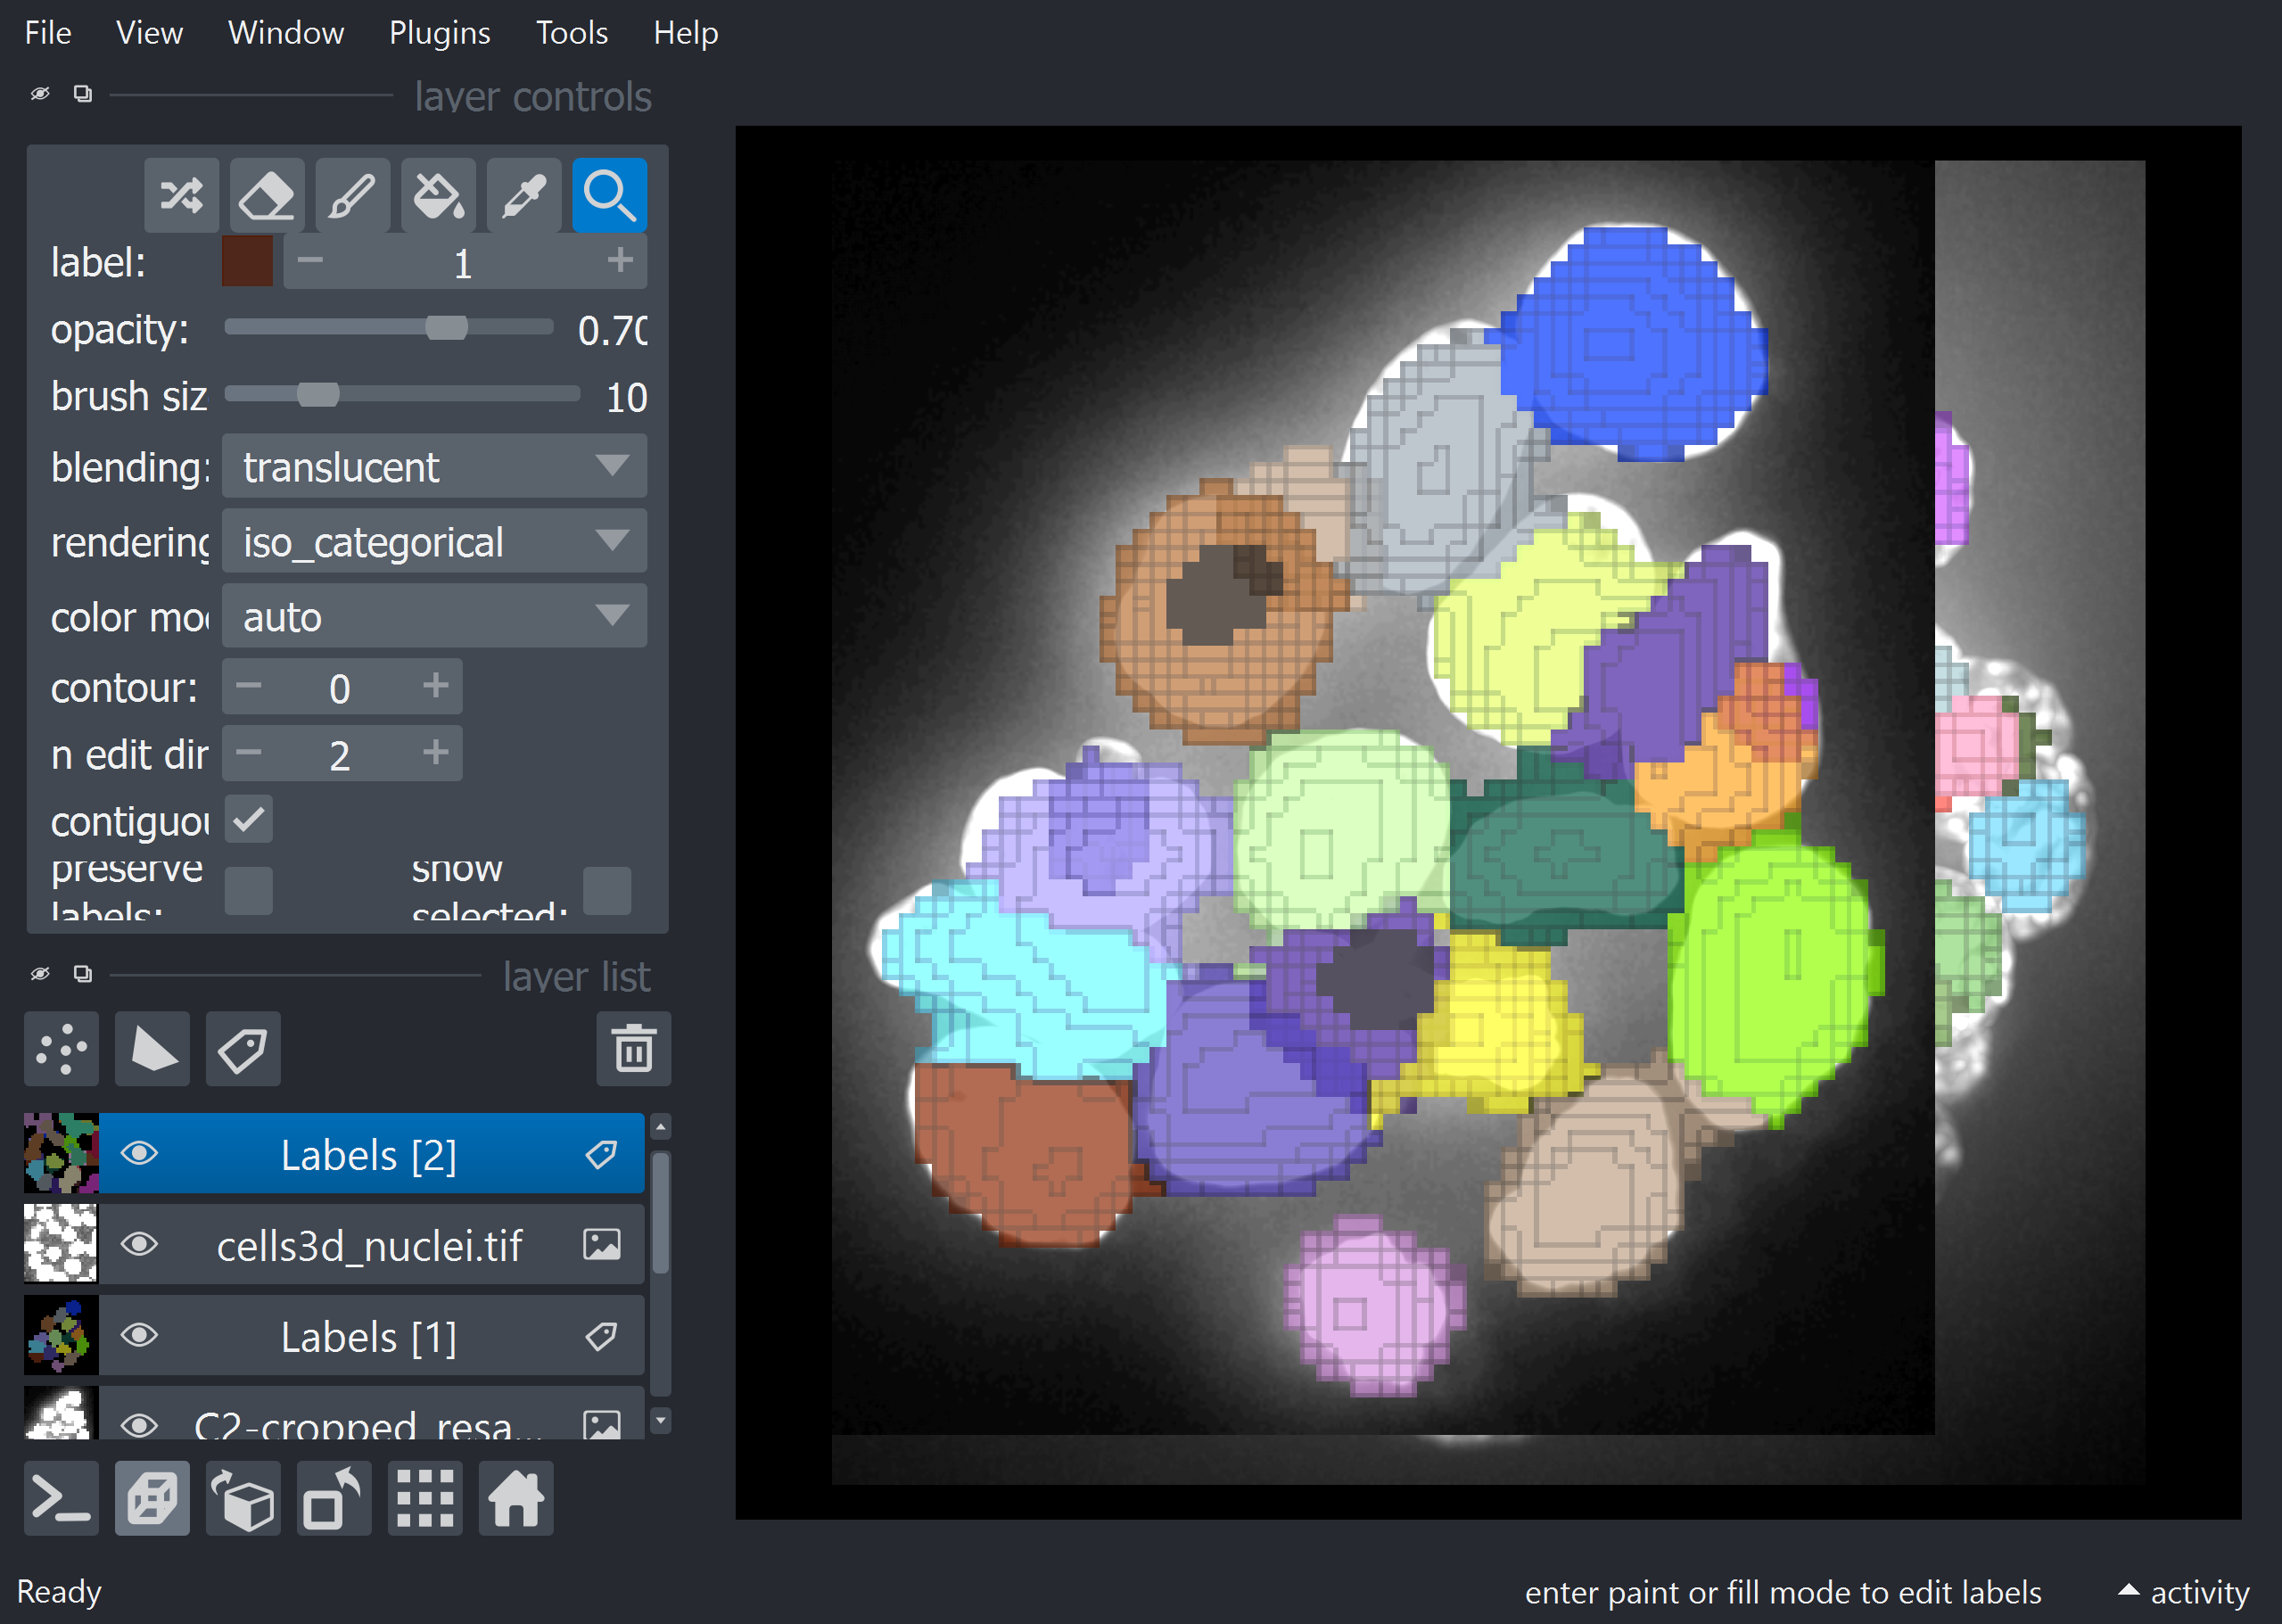

In [7]:
viewer.dims.current_step = (10, 0, 0)
viewer.dims.ndisplay = 3
nbscreenshot(viewer)